In [1]:
from pyproj import Transformer

# TM 중부원점 (EPSG:5174) -> WGS84 (EPSG:4326)
transformer = Transformer.from_crs("epsg:5186", "epsg:4326")

# 예제 좌표 (TM 중부 좌표계의 X, Y)
x = 198511.6
y = 553626.4

# 변환 수행
longitude, latitude = transformer.transform(x, y)

print(f"경위도: {longitude}, {latitude}")

경위도: 34.321464317186326, 130.84123405655623


In [2]:
import pandas as pd

df = pd.read_csv('./pothole_data.csv')

# UID에서 연도, 월, 일을 추출하는 함수 정의
def extract_date(uid):
    # UID 형식이 'RAD05_YYYYMMDDHHMMSS_ID' 형식이라고 가정
    date_str = uid.split('_')[1]  # 'YYYYMMDDHHMMSS' 부분 추출
    year = '20' + date_str[:2]
    month = date_str[2:4]
    day = date_str[4:6]
    return year, month, day

# 각 행에 대해 연도, 월, 일을 추출하여 새로운 컬럼 추가
df[['Year', 'Month', 'Day']] = df['DTCT_UID'].apply(lambda x: pd.Series(extract_date(x)))

# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new_df = df[['Year', 'Month', 'Day', 'PLC_LTTD', 'PLC_LGTD', 'ROAD_INFO', 'DSTA_LGLD_INFO', 'DSTA_ADSTRD_INFO']]

# 새로 생성된 테이블 확인
print(new_df.head())

# CSV 파일로 저장 (예: 'processed_pothole_data.csv')
new_df.to_csv('processed_pothole_data.csv', index=False, encoding='cp949')

   Year Month Day   PLC_LTTD    PLC_LGTD             ROAD_INFO DSTA_LGLD_INFO  \
0  2024    04  05  36.354964  127.344916     대전광역시 유성구 봉명동 574            봉명동   
1  2024    04  05  36.357288  127.340732     대전광역시 유성구 봉명동 531            봉명동   
2  2024    04  05  36.356196  127.332836     대전광역시 유성구 구암동 631            구암동   
3  2024    04  05  36.355887  127.340315  대전광역시 유성구 봉명동 442-10            봉명동   
4  2024    04  05  36.354569  127.350205     대전광역시 유성구 봉명동 700            봉명동   

  DSTA_ADSTRD_INFO  
0             온천1동  
1             온천1동  
2             온천1동  
3             온천1동  
4             온천1동  


In [3]:
p_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')
p_df

,Year,Month,Day,PLC_LTTD,PLC_LGTD,ROAD_INFO,DSTA_LGLD_INFO,DSTA_ADSTRD_INFO
0,2024,4,5,36.354964,127.344916,대전광역시 유성구 봉명동 574,봉명동,온천1동
1,2024,4,5,36.357288,127.340732,대전광역시 유성구 봉명동 531,봉명동,온천1동
2,2024,4,5,36.356196,127.332836,대전광역시 유성구 구암동 631,구암동,온천1동
3,2024,4,5,36.355887,127.340315,대전광역시 유성구 봉명동 442-10,봉명동,온천1동
4,2024,4,5,36.354569,127.350205,대전광역시 유성구 봉명동 700,봉명동,온천1동
...,...,...,...,...,...,...,...,...
741,2024,1,19,36.427741,127.387724,대전광역시 유성구 관평동 1286,관평동,관평동
742,2024,1,19,36.427899,127.387323,대전광역시 유성구 관평동 1286,관평동,관평동
743,2024,1,19,36.398783,127.358005,대전광역시 유성구 장동 202-11,장동,신성동
744,2024,1,19,36.398713,127.357864,대전광역시 유성구 장동 202-11,장동,신성동


In [4]:
result_df = p_df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Pothole_Count')

# 결과 확인
print(result_df.head(20))

# 필요한 경우 CSV 파일로 저장
result_df.to_csv('processed_pothole_count_data.csv', index=False, encoding='cp949')

    Year  Month  Day  Pothole_Count
0   2024      1   19              7
1   2024      1   23              3
2   2024      2   13              3
3   2024      2   14              8
4   2024      2   19             10
5   2024      2   22              2
6   2024      2   23              5
7   2024      2   26              7
8   2024      2   27              2
9   2024      2   28             64
10  2024      2   29             37
11  2024      3    1              5
12  2024      3    2              1
13  2024      3    4              8
14  2024      3    5              8
15  2024      3    6             18
16  2024      3    7             18
17  2024      3    8             12
18  2024      3   15             24
19  2024      3   16             20

In [5]:
df = pd.read_csv('./temperature_data.csv', encoding='cp949')

print(df.isna().sum())

# '일시' 컬럼에서 연도, 월, 일 정보를 추출하여 새로운 컬럼 추가
df['Year'] = pd.to_datetime(df['일시']).dt.year.astype(int)
df['Month'] = pd.to_datetime(df['일시']).dt.month.astype(int)
df['Day'] = pd.to_datetime(df['일시']).dt.day.astype(int)

# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new_df = df[['Year', 'Month', 'Day', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차']]

# 새로 생성된 테이블 확인
print(new_df.head())

print(new_df.isna().sum())

# CSV 파일로 저장 (예: 'processed_temperature_data.csv')
new_df.to_csv('processed_temperature_data.csv', index=False, encoding='cp949')

\t\t지점번호    0
지점명         0
일시          0
평균기온(℃)     0
최고기온(℃)     0
\t최고기온시각    0
최저기온(℃)     1
최저기온시각      1
일교차         1
dtype: int64
   Year  Month  Day  평균기온(℃)  최고기온(℃)  최저기온(℃)  일교차
0  2020      1    1     -2.2      0.3     -6.5  6.8
1  2020      1    2      1.0      3.8     -0.7  4.5
2  2020      1    3     -0.1      4.6     -3.4  8.0
3  2020      1    4      1.2      6.1     -2.8  8.9
4  2020      1    5      1.3      6.6     -3.2  9.8
Year       0
Month      0
Day        0
평균기온(℃)    0
최고기온(℃)    0
최저기온(℃)    1
일교차        1
dtype: int64


In [6]:
t_df = pd.read_csv('./processed_temperature_data.csv', encoding='cp949')
t_df

,Year,Month,Day,평균기온(℃),최고기온(℃),최저기온(℃),일교차
0,2020,1,1,-2.2,0.3,-6.5,6.8
1,2020,1,2,1.0,3.8,-0.7,4.5
2,2020,1,3,-0.1,4.6,-3.4,8.0
3,2020,1,4,1.2,6.1,-2.8,8.9
4,2020,1,5,1.3,6.6,-3.2,9.8
...,...,...,...,...,...,...,...
1763,2024,10,29,15.0,18.3,13.4,4.9
1764,2024,10,30,15.7,21.4,11.4,10.0
1765,2024,10,31,15.9,22.6,11.0,11.6
1766,2024,11,1,15.3,18.7,12.9,5.8


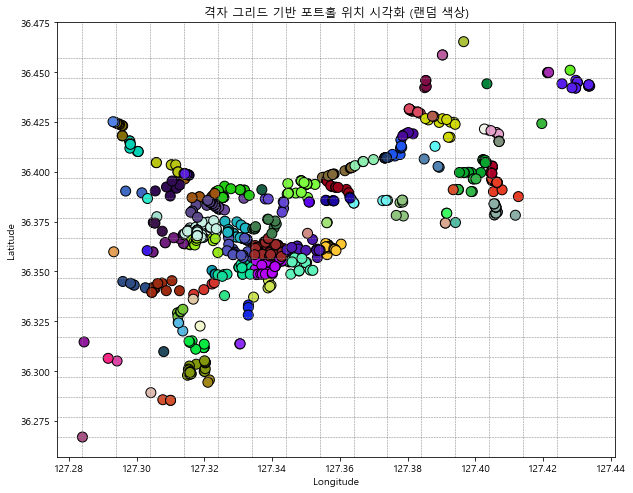

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 데이터 로드
p_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')

# 격자 설정: 위도와 경도의 전체 범위를 포함하도록 설정
grid_size = 0.01  # 격자 간격 설정

# 위도 및 경도의 최소값과 최대값 구하기
min_lat, max_lat = p_df['PLC_LTTD'].min(), p_df['PLC_LTTD'].max()
min_lon, max_lon = p_df['PLC_LGTD'].min(), p_df['PLC_LGTD'].max()

# 격자 위치 계산 (포인트가 속한 셀 찾기)
p_df['Grid_X'] = ((p_df['PLC_LTTD'] - min_lat) // grid_size).astype(int)
p_df['Grid_Y'] = ((p_df['PLC_LGTD'] - min_lon) // grid_size).astype(int)

# 그룹화하여 각 격자 셀에 고유한 ID 할당
p_df['Grid_ID'] = p_df.groupby(['Grid_X', 'Grid_Y']).ngroup()

# 각 Grid_ID에 대해 랜덤 색상 할당
unique_ids = p_df['Grid_ID'].unique()
np.random.seed(42)  # 재현성을 위해 시드 설정
random_colors = {grid_id: np.random.rand(3,) for grid_id in unique_ids}
p_df['Color'] = p_df['Grid_ID'].map(random_colors)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(p_df['PLC_LGTD'], p_df['PLC_LTTD'], color=p_df['Color'].tolist(), s=100, edgecolor='k')
plt.title("격자 그리드 기반 포트홀 위치 시각화 (랜덤 색상)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# 격자 경계선을 추가하여 표시
for x in np.arange(min_lon, max_lon, grid_size):
    plt.axvline(x, color='grey', linestyle='--', linewidth=0.5)
for y in np.arange(min_lat, max_lat, grid_size):
    plt.axhline(y, color='grey', linestyle='--', linewidth=0.5)

plt.grid(False)
plt.show()

# 각 포인트별 그리드 아이디를 추가해서 저장

In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 데이터 불러오기
t_df = pd.read_csv('./processed_temperature_data.csv', encoding='cp949')

# 날짜 컬럼 생성
t_df['Date'] = pd.to_datetime(t_df[['Year', 'Month', 'Day']])

# 서브플롯을 사용하여 각 기온 데이터를 개별 플롯으로 시각화
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("평균기온(℃)", "최고기온(℃)", "최저기온(℃)", "일교차"))

# 평균기온 그래프
fig.add_trace(
    go.Scatter(x=t_df['Date'], y=t_df['평균기온(℃)'], mode='lines+markers', name='평균기온(℃)', line=dict(color='blue')),
    row=1, col=1
)

# 최고기온 그래프
fig.add_trace(
    go.Scatter(x=t_df['Date'], y=t_df['최고기온(℃)'], mode='lines+markers', name='최고기온(℃)', line=dict(color='red')),
    row=2, col=1
)

# 최저기온 그래프
fig.add_trace(
    go.Scatter(x=t_df['Date'], y=t_df['최저기온(℃)'], mode='lines+markers', name='최저기온(℃)', line=dict(color='green')),
    row=3, col=1
)

# 일교차 그래프
fig.add_trace(
    go.Scatter(x=t_df['Date'], y=t_df['일교차'], mode='lines+markers', name='일교차', line=dict(color='purple')),
    row=4, col=1
)

# 그래프 레이아웃 설정
fig.update_layout(height=800, width=1000, title_text="기온 데이터 시각화 (개별 그래프)")
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Temperature (℃)")

# 개별 그래프 표시
fig.show()

# 통합 그래프
fig_combined = go.Figure()

fig_combined.add_trace(go.Scatter(x=t_df['Date'], y=t_df['평균기온(℃)'], mode='lines+markers', name='평균기온(℃)', line=dict(color='blue')))
fig_combined.add_trace(go.Scatter(x=t_df['Date'], y=t_df['최고기온(℃)'], mode='lines+markers', name='최고기온(℃)', line=dict(color='red')))
fig_combined.add_trace(go.Scatter(x=t_df['Date'], y=t_df['최저기온(℃)'], mode='lines+markers', name='최저기온(℃)', line=dict(color='green')))
fig_combined.add_trace(go.Scatter(x=t_df['Date'], y=t_df['일교차'], mode='lines+markers', name='일교차', line=dict(color='purple')))

# 통합 그래프 레이아웃 설정
fig_combined.update_layout(
    title="기온 데이터 시각화 (통합 그래프)",
    xaxis_title="Date",
    yaxis_title="Temperature (℃)",
    height=600,
    width=1000
)

# 통합 그래프 표시
fig_combined.show()


In [23]:
import pandas as pd
import plotly.express as px

# 데이터 불러오기 (파일명을 실제 파일명으로 변경)
df = pd.read_csv('processed_rainfall_data.csv', encoding='cp949')

# Year, Month, Day를 날짜로 변환
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# plotly를 사용하여 시각화
fig = px.line(df, x='Date', y='일일강수량', title='일일 강수량 시각화')
fig.update_layout(xaxis_title='Date', yaxis_title='일일강수량 (mm)')

# 그래프 보여주기
fig.show()

In [10]:
# 데이터 불러오기
df = pd.read_csv('./rainfall_data.csv', encoding='cp949')

# 조사년월일을 datetime 형식으로 변환
df['조사년월일'] = pd.to_datetime(df['조사년월일'], format='%Y%m%d')

# 조사년월일별 일일강수량 합계 계산
daily_rainfall_sum = df.groupby(df['조사년월일'].dt.date)['일일강수량'].mean().reset_index()

# 년, 월, 일 컬럼 추가
daily_rainfall_sum['Year'] = pd.to_datetime(daily_rainfall_sum['조사년월일']).dt.year
daily_rainfall_sum['Month'] = pd.to_datetime(daily_rainfall_sum['조사년월일']).dt.month
daily_rainfall_sum['Day'] = pd.to_datetime(daily_rainfall_sum['조사년월일']).dt.day

# 컬럼 순서 조정 (Year, Month, Day, 일일강수량)
daily_rainfall_sum = daily_rainfall_sum[['Year', 'Month', 'Day', '일일강수량']]

# CSV 파일로 저장
daily_rainfall_sum.to_csv('processed_rainfall_data.csv', index=False, encoding='cp949')

In [19]:
import pandas as pd

# 데이터 로드 (파일명은 실제 파일명으로 변경)
pothole_df = pd.read_csv('processed_pothole_count_data.csv', encoding='cp949')  # 포트홀 데이터
temperature_df = pd.read_csv('processed_temperature_data.csv', encoding='cp949')  # 기온 데이터
rainfall_df = pd.read_csv('processed_rainfall_data.csv', encoding='cp949')  # 강수량 데이터

# 날짜 컬럼 생성
pothole_df['Date'] = pd.to_datetime(pothole_df[['Year', 'Month', 'Day']])
temperature_df['Date'] = pd.to_datetime(temperature_df[['Year', 'Month', 'Day']])
rainfall_df['Date'] = pd.to_datetime(rainfall_df[['Year', 'Month', 'Day']])

# 포트홀 데이터에 새로운 컬럼 추가할 준비
pothole_df['최근7일_평균기온'] = None
pothole_df['최근7일_평균최고기온'] = None
pothole_df['최근7일_평균최저기온'] = None
pothole_df['최근7일_평균일교차'] = None
pothole_df['최근7일_평균강수량'] = None

pothole_df['최근1개월_평균기온'] = None
pothole_df['최근1개월_평균최고기온'] = None
pothole_df['최근1개월_평균최저기온'] = None
pothole_df['최근1개월_평균일교차'] = None
pothole_df['최근1개월_평균강수량'] = None

# 각 포트홀 데이터에 대해 최근 7일 및 1개월 데이터 추출 및 평균 계산
for i, row in pothole_df.iterrows():
    date = row['Date']
    
    # 최근 7일 동안의 데이터 필터링 및 평균 계산
    last_7_days = temperature_df[(temperature_df['Date'] < date) & (temperature_df['Date'] >= date - pd.Timedelta(days=7))]
    last_7_days_rain = rainfall_df[(rainfall_df['Date'] < date) & (rainfall_df['Date'] >= date - pd.Timedelta(days=7))]
    if not last_7_days.empty:
        pothole_df.at[i, '최근7일_평균기온'] = last_7_days['평균기온(℃)'].mean()
        pothole_df.at[i, '최근7일_평균최고기온'] = last_7_days['최고기온(℃)'].mean()
        pothole_df.at[i, '최근7일_평균최저기온'] = last_7_days['최저기온(℃)'].mean()
        pothole_df.at[i, '최근7일_평균일교차'] = last_7_days['일교차'].mean()
    if not last_7_days_rain.empty:
        pothole_df.at[i, '최근7일_평균강수량'] = last_7_days_rain['일일강수량'].mean()
    
    # 최근 1개월(30일) 동안의 데이터 필터링 및 평균 계산
    last_30_days = temperature_df[(temperature_df['Date'] < date) & (temperature_df['Date'] >= date - pd.Timedelta(days=30))]
    last_30_days_rain = rainfall_df[(rainfall_df['Date'] < date) & (rainfall_df['Date'] >= date - pd.Timedelta(days=30))]
    if not last_30_days.empty:
        pothole_df.at[i, '최근1개월_평균기온'] = last_30_days['평균기온(℃)'].mean()
        pothole_df.at[i, '최근1개월_평균최고기온'] = last_30_days['최고기온(℃)'].mean()
        pothole_df.at[i, '최근1개월_평균최저기온'] = last_30_days['최저기온(℃)'].mean()
        pothole_df.at[i, '최근1개월_평균일교차'] = last_30_days['일교차'].mean()
    if not last_30_days_rain.empty:
        pothole_df.at[i, '최근1개월_평균강수량'] = last_30_days_rain['일일강수량'].mean()

# 'Date' 컬럼 제거
pothole_df = pothole_df.drop(columns=['Date'])

# 결과 확인
print(pothole_df.head())

# CSV 파일로 저장
pothole_df.to_csv('processed_pothole_temperature_rainfall_data.csv', index=False, encoding='cp949')


   Year  Month  Day  Pothole_Count 최근7일_평균기온 최근7일_평균최고기온 최근7일_평균최저기온  \
0  2024      1   19              7       0.0    4.214286   -3.357143   
1  2024      1   23              3  0.685714    4.485714   -2.357143   
2  2024      2   13              3  1.385714         5.9   -1.985714   
3  2024      2   14              8  2.385714    7.442857        -1.7   
4  2024      2   19             10       6.0        11.9         1.0   

  최근7일_평균일교차 최근7일_평균강수량 최근1개월_평균기온 최근1개월_평균최고기온 최근1개월_평균최저기온 최근1개월_평균일교차  \
0   7.571429   1.398578  -0.856667     2.896667    -4.173333        7.07   
1   6.842857   1.161565   0.453333     4.056667    -2.663333        6.72   
2   7.885714    0.00974   0.246667         4.75    -3.236667    7.986667   
3   9.142857        0.0       0.54     5.126667        -3.06    8.186667   
4       10.9   2.964286   1.393333     6.246667        -2.43    8.676667   

  최근1개월_평균강수량  
0    0.856897  
1    0.870836  
2    0.441486  
3    0.367244  
4    0.806818  


c:\Users\jhkwo\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\jhkwo\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



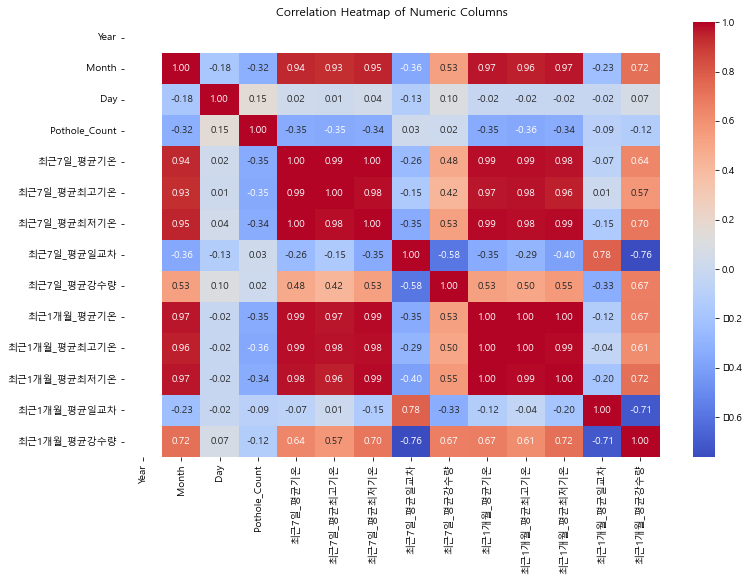

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

df = pd.read_csv('processed_pothole_temperature_rainfall_data.csv', encoding='cp949')

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 문자열로 되어 있는 컬럼 제외하고 숫자형 컬럼만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

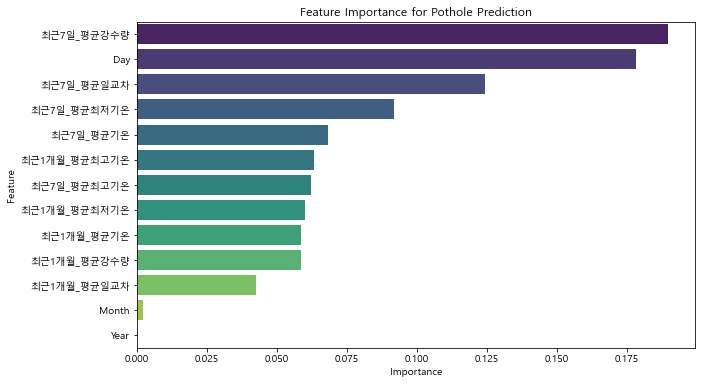

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 (파일명을 실제 파일명으로 변경)
df = pd.read_csv('processed_pothole_temperature_rainfall_data.csv', encoding='cp949')

# NaN 값을 0으로 대체
df = df.fillna(0)

# 특성과 타겟 변수 정의
X = df[['Year', 'Month', 'Day', '최근7일_평균기온', '최근7일_평균최고기온', '최근7일_평균최저기온', 
        '최근7일_평균일교차', '최근7일_평균강수량', '최근1개월_평균기온', '최근1개월_평균최고기온', 
        '최근1개월_평균최저기온', '최근1개월_평균일교차', '최근1개월_평균강수량']]
y = df['Pothole_Count']

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 피쳐 중요도 추출
feature_importances = model.feature_importances_

# 피쳐 중요도를 데이터프레임으로 변환하여 시각화
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Pothole Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
import numpy as np

# 예측값과 실제값 간의 차이가 일정 비율 이하인 경우를 정확하게 예측한 것으로 간주
tolerance = 0.3  # 10% 허용 오차

# 테스트 데이터에 대한 예측값 생성
y_pred = model.predict(X_test)

# 정확도 계산 (예측값이 실제값의 ±10% 범위 내에 있으면 정확하다고 간주)
accuracy = np.mean(np.abs((y_test - y_pred) / y_test) < tolerance) * 100
print(f'Accuracy within ±{tolerance * 100}% tolerance: {accuracy:.2f}%')


Accuracy within ±30.0% tolerance: 43.75%
